In [1]:
from ModelingUtils.trainers import Cwdn, NVAE

# BTC_4h

## Conv wide deep net

In [2]:
cwdn = Cwdn('btc_4h_for_target1_1', 'target1', suffix=1, batch_size=127, max_epochs=50)

cuda


In [3]:
cwdn.generate_model(seed=0)

ConvWideDeepLSTMNet(
  (conv_net): ConvNet74(
    (conv1): Conv2d(1, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 0))
    (max1): MaxPool2d(kernel_size=(1, 3), stride=(1, 3), padding=(0, 0), dilation=1, ceil_mode=False)
    (batch1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(48, 64, kernel_size=(3, 5), stride=(1, 1), padding=(1, 0))
    (max2): MaxPool2d(kernel_size=(1, 3), stride=(1, 1), padding=(0, 0), dilation=1, ceil_mode=False)
    (batch2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 64, kernel_size=(3, 7), stride=(1, 1), padding=(1, 0))
    (batch3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv4): Conv3d(1, 1, kernel_size=(64, 1, 1), stride=(1, 1, 1))
    (batch4): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (deep_lstm): DeepLSTMNet(
    (l1): LSTMCell(12, 90)
    (l2): LS

In [4]:
cwdn.train_model(lr=16e-4, weight_decay=5e-4, patience=5, just_load=True)

100%|██████████████████████████████████████████████████████████████████████████████| 7118/7118 [01:25<00:00, 83.53it/s]


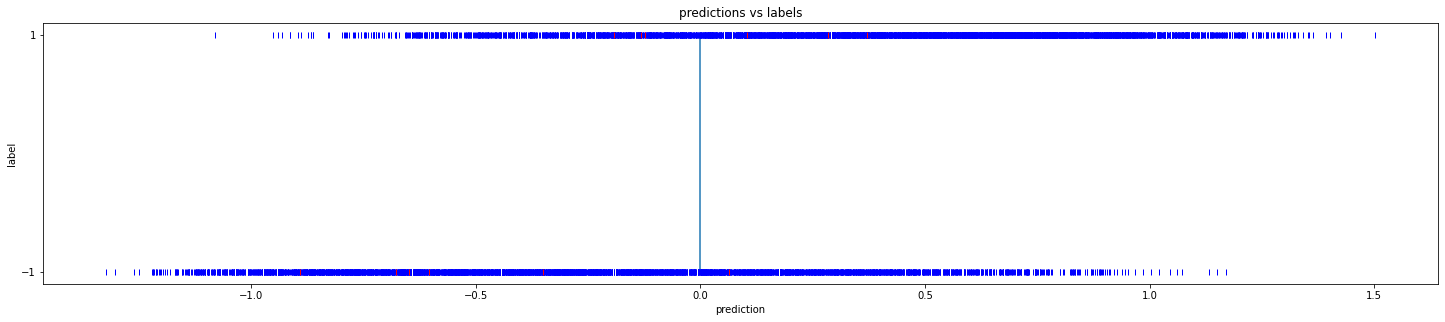

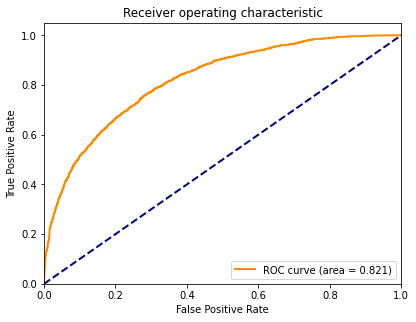

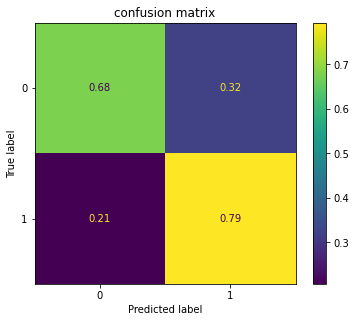

accuracy: 0.7379881989322844
f_score_rise: 0.7616613418530352, precision_rise: 0.7329070339399901, recall_rise: 0.7927640329874966
f_score_fall: 0.7090937451255654, precision_fall: 0.7447575360419397, recall_fall: 0.6766894909199166


100%|██████████████████████████████████████████████████████████████████████████████| 1420/1420 [00:17<00:00, 83.46it/s]


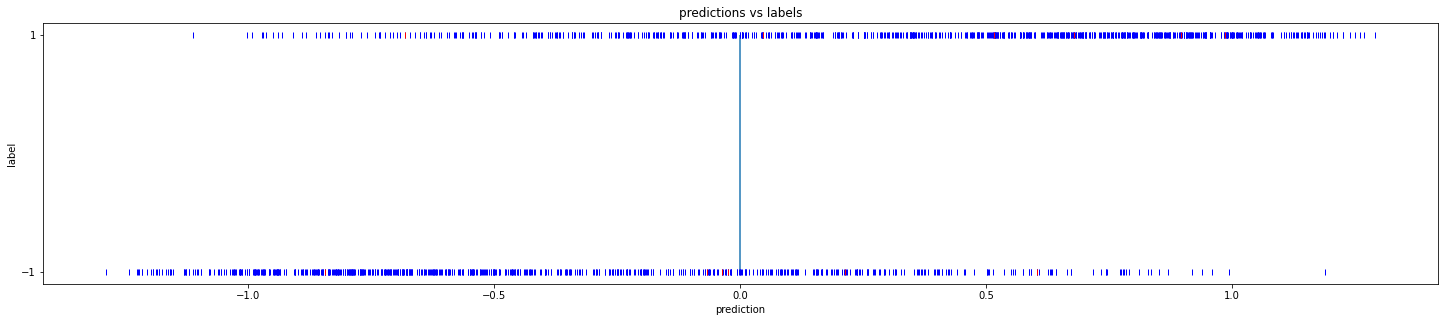

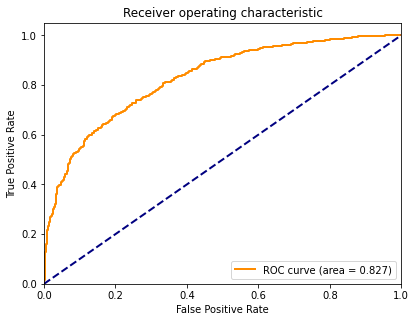

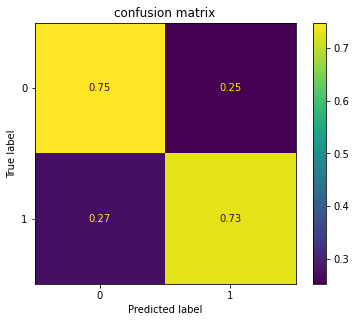

accuracy: 0.7373239436619718
f_score_rise: 0.7501674480910918, precision_rise: 0.7734806629834254, recall_rise: 0.7282184655396619
f_score_fall: 0.7230883444691909, precision_fall: 0.6997126436781609, recall_fall: 0.7480798771121352


100%|████████████████████████████████████████████████████████████████████████████████| 960/960 [00:11<00:00, 83.61it/s]


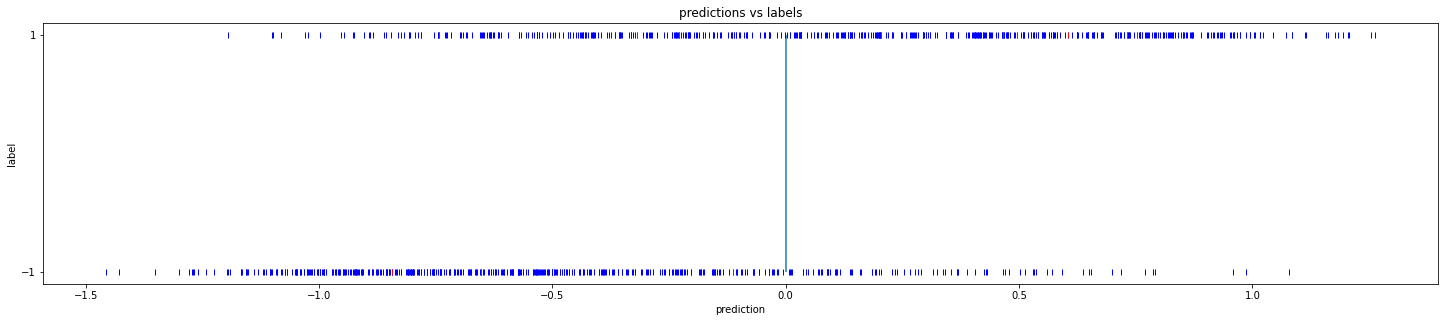

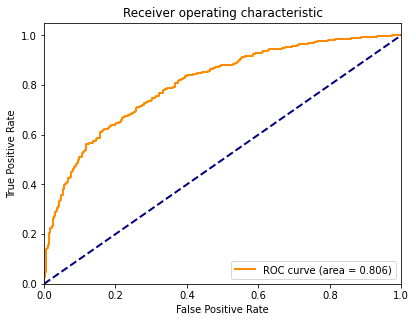

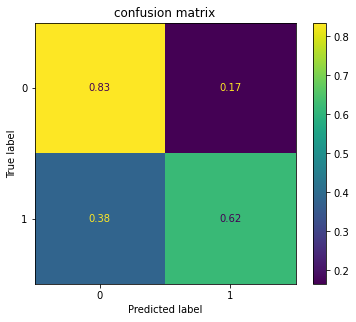

accuracy: 0.7229166666666667
f_score_rise: 0.6970387243735763, precision_rise: 0.7989556135770235, recall_rise: 0.6181818181818182
f_score_fall: 0.7447216890595009, precision_fall: 0.6724436741767764, recall_fall: 0.8344086021505376


In [5]:
cwdn.generate_results()

100%|████████████████████████████████████████████████████████████████████████████████| 960/960 [00:13<00:00, 73.37it/s]


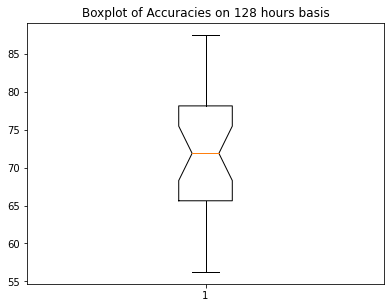

In [5]:
accuracies = cwdn.generate_test_stats()

100%|████████████████████████████████████████████████████████████████████████████████| 960/960 [00:12<00:00, 76.41it/s]


number of samples in reduced validation set 666


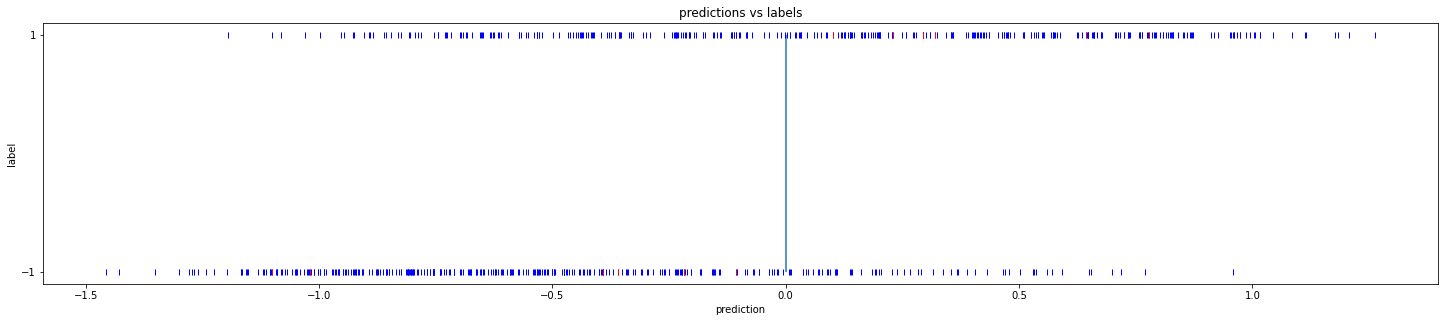

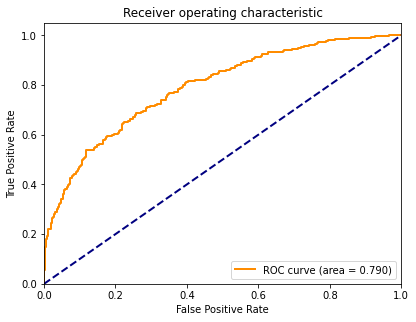

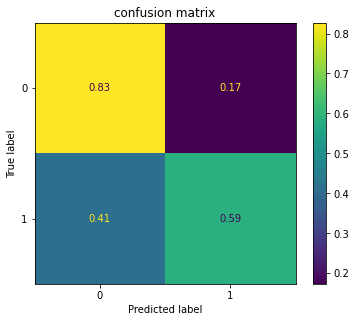

accuracy: 0.7057057057057057
f_score_rise: 0.668918918918919, precision_rise: 0.7764705882352941, recall_rise: 0.5875370919881305
f_score_fall: 0.7351351351351352, precision_fall: 0.6618004866180048, recall_fall: 0.8267477203647416


In [6]:
cwdn.generate_reduced_val_results()

## NVAE net -> Fully connected

In [2]:
nvae = NVAE('btc_4h_for_target1_1', 'target1', suffix=1, batch_size=127, latent_dim=36, nca_dim=10, onca_c=3, kl_c=0.1, max_epochs=50)

cuda


In [3]:
nvae.generate_autoencoder(seed=0)

conv_net weights frozen
VariationalAutoencoder(
  (encoder): VariationalEncoder(
    (conv_net): ConvNet74(
      (conv1): Conv2d(1, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 0))
      (max1): MaxPool2d(kernel_size=(1, 3), stride=(1, 3), padding=(0, 0), dilation=1, ceil_mode=False)
      (batch1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(48, 64, kernel_size=(3, 5), stride=(1, 1), padding=(1, 0))
      (max2): MaxPool2d(kernel_size=(1, 3), stride=(1, 1), padding=(0, 0), dilation=1, ceil_mode=False)
      (batch2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 64, kernel_size=(3, 7), stride=(1, 1), padding=(1, 0))
      (batch3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv4): Conv3d(1, 1, kernel_size=(64, 1, 1), stride=(1, 1, 1))
      (batch4): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_s

In [4]:
nvae.train_auto_encoder(lr=16e-4, weight_decay=5e-4, patience=1, just_load=True)

100%|██████████████████████████████████████████████████████████████████████████████| 1420/1420 [00:18<00:00, 78.39it/s]


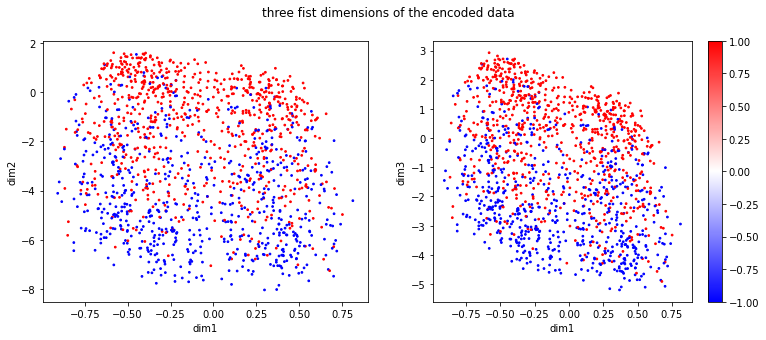

In [9]:
nvae.plot_encoded_space()

In [5]:
nvae.generate_fully_connected_network(seed=0)

In [6]:
nvae.train_fully_connected_net(lr=4e-4, weight_decay=1e-5, w1=0.75, w2=0.25, patience=3, just_load=True)

100%|██████████████████████████████████████████████████████████████████████████████| 7118/7118 [01:33<00:00, 75.81it/s]


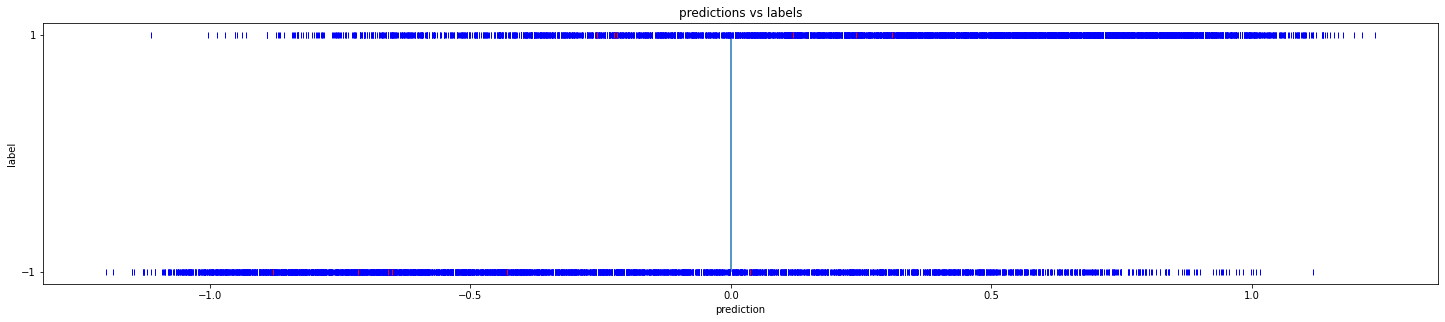

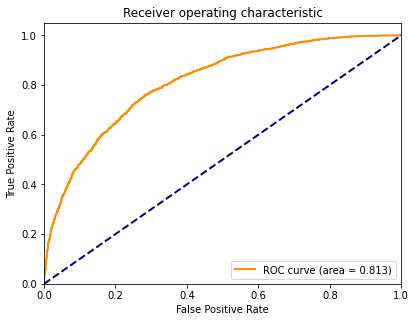

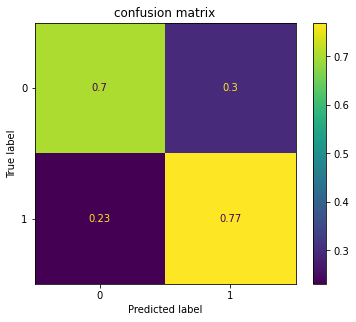

accuracy: 0.7381286878336611
f_score_rise: 0.7562761506276151, precision_rise: 0.7436358961172538, recall_rise: 0.7693535514764565
f_score_fall: 0.7170613236187006, precision_fall: 0.7314958191390524, recall_fall: 0.7031854718666269


100%|██████████████████████████████████████████████████████████████████████████████| 1420/1420 [00:18<00:00, 76.28it/s]


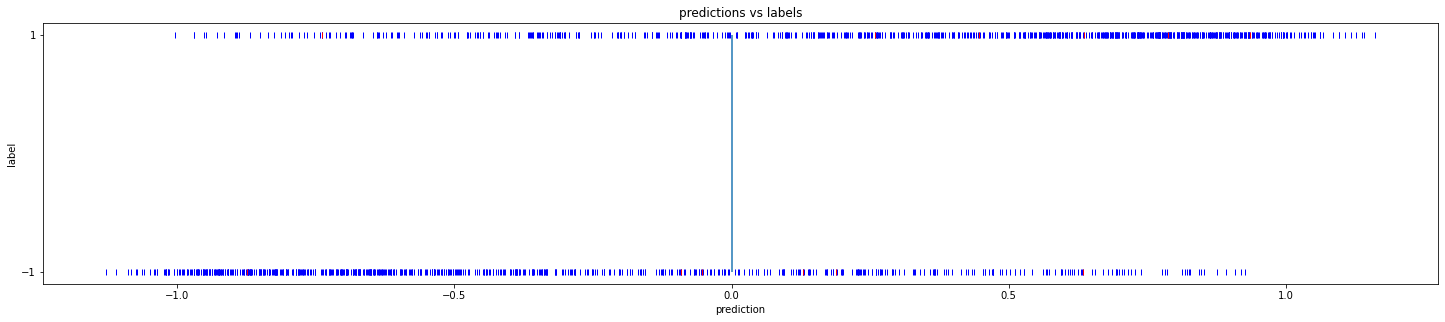

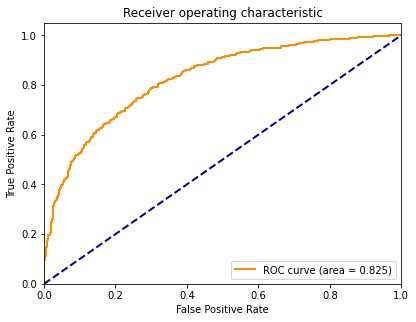

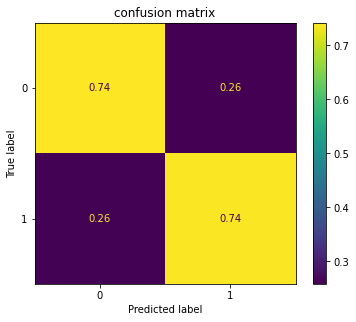

accuracy: 0.7408450704225352
f_score_rise: 0.7556440903054448, precision_rise: 0.7720488466757124, recall_rise: 0.7399219765929779
f_score_fall: 0.7241379310344828, precision_fall: 0.7071742313323572, recall_fall: 0.7419354838709677


100%|████████████████████████████████████████████████████████████████████████████████| 960/960 [00:12<00:00, 76.58it/s]


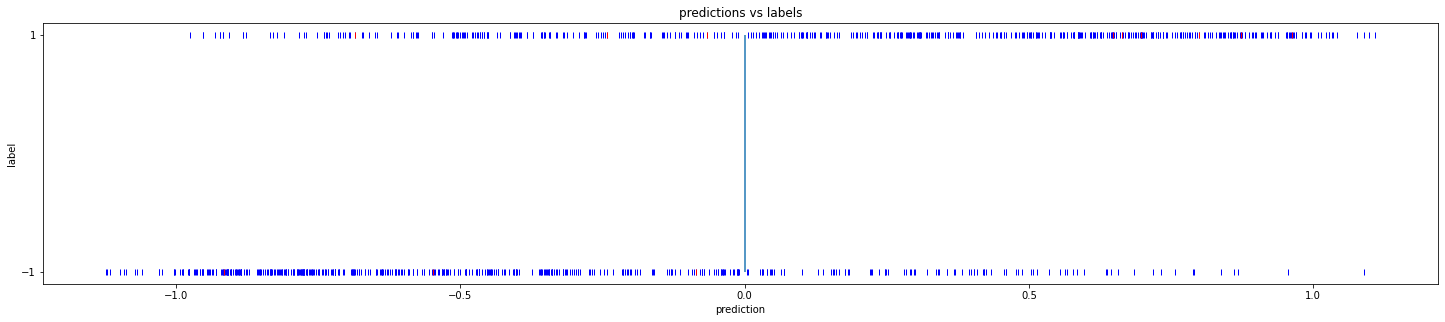

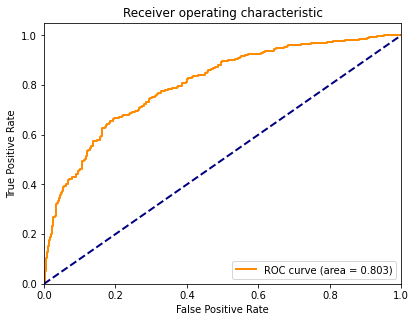

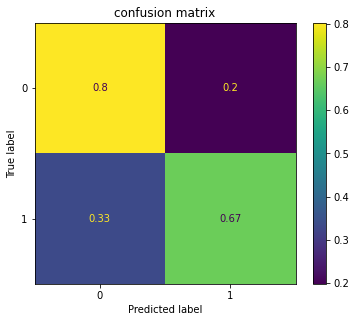

accuracy: 0.7322916666666667
f_score_rise: 0.7197382769901853, precision_rise: 0.7819905213270142, recall_rise: 0.6666666666666666
f_score_fall: 0.7437686939182453, precision_fall: 0.6933085501858736, recall_fall: 0.8021505376344086


In [12]:
nvae.generate_fc_results()

100%|████████████████████████████████████████████████████████████████████████████████| 960/960 [00:13<00:00, 69.00it/s]


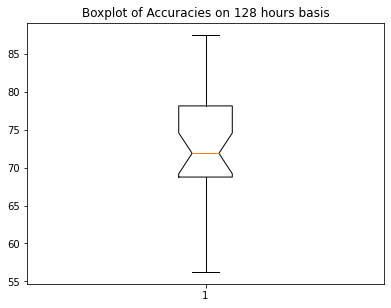

In [7]:
nvae.generate_fc_test_stats()

100%|████████████████████████████████████████████████████████████████████████████████| 960/960 [00:13<00:00, 72.99it/s]


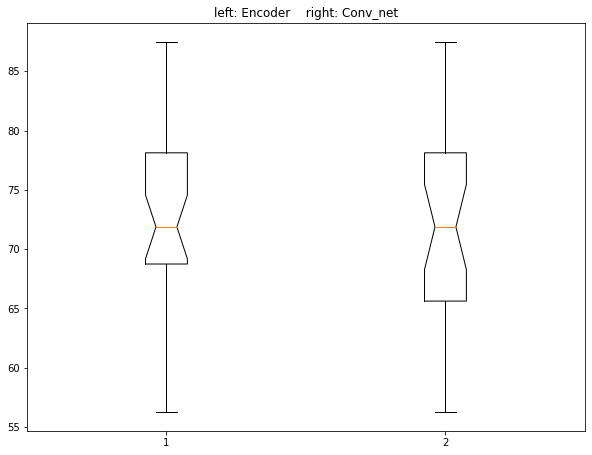

In [11]:
nvae.generate_fc_test_stats(add_plot={'title_1': 'Encoder', 'title_2': 'Conv_net', 'scores': accuracies})

## NVAE net -> SVM

In [8]:
nvae.generate_svm(kernel='poly', degree=2, r=1, c=8.5e-5, gamma=1/10)

In [9]:
nvae.train_svm()

100%|██████████████████████████████████████████████████████████████████████████████| 7118/7118 [01:32<00:00, 77.36it/s]


(7118, 1, 10)


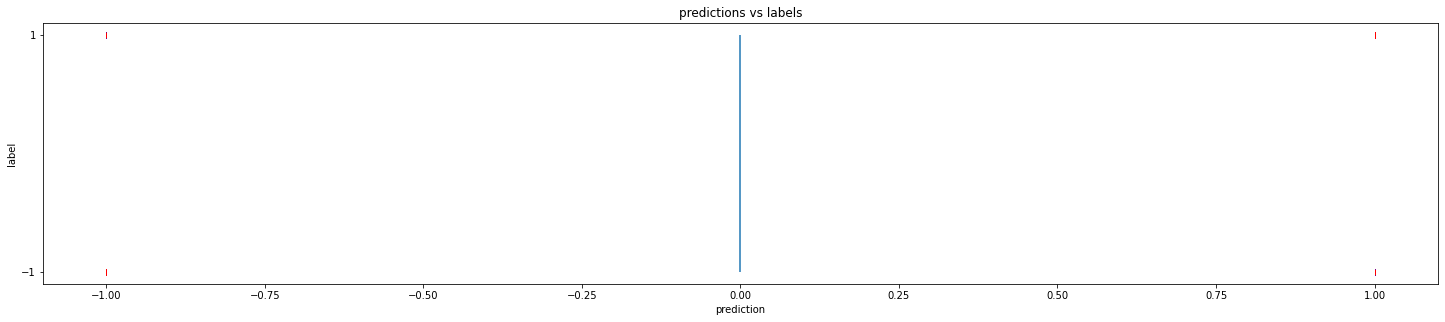

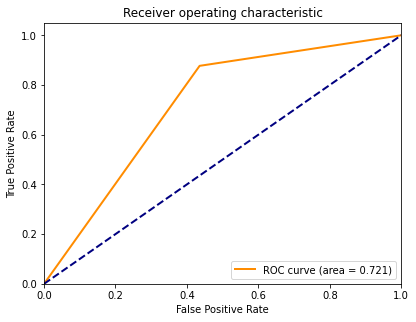

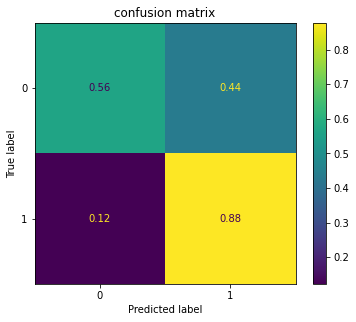

accuracy: 0.7295588648496769
f_score_rise: 0.7740345110928513, precision_rise: 0.6926470588235294, recall_rise: 0.8770949720670391
f_score_fall: 0.6632849396536645, precision_fall: 0.8040712468193384, recall_fall: 0.564453706460256


100%|██████████████████████████████████████████████████████████████████████████████| 1420/1420 [00:18<00:00, 78.15it/s]


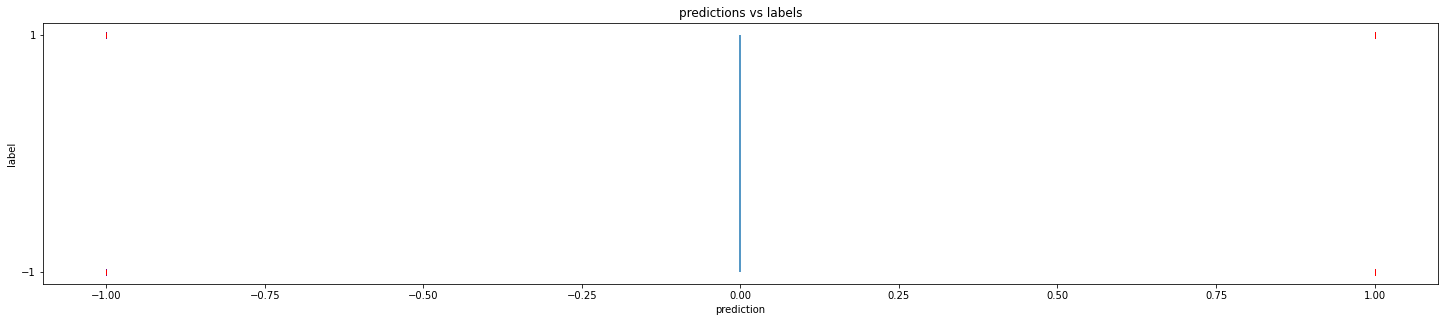

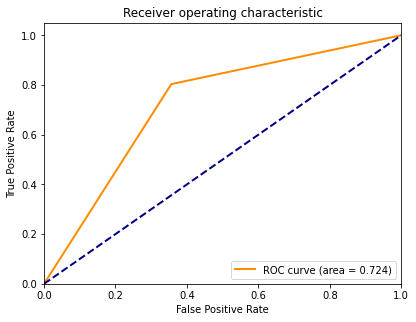

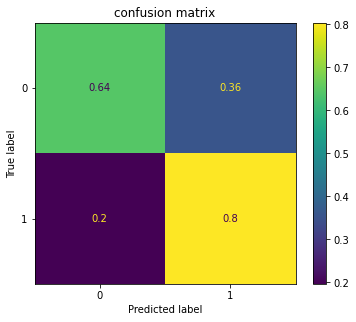

accuracy: 0.7302816901408451
f_score_rise: 0.7634342186534898, precision_rise: 0.7270588235294118, recall_rise: 0.8036410923276983
f_score_fall: 0.6863226863226862, precision_fall: 0.7350877192982456, recall_fall: 0.6436251920122887


100%|████████████████████████████████████████████████████████████████████████████████| 960/960 [00:12<00:00, 78.83it/s]


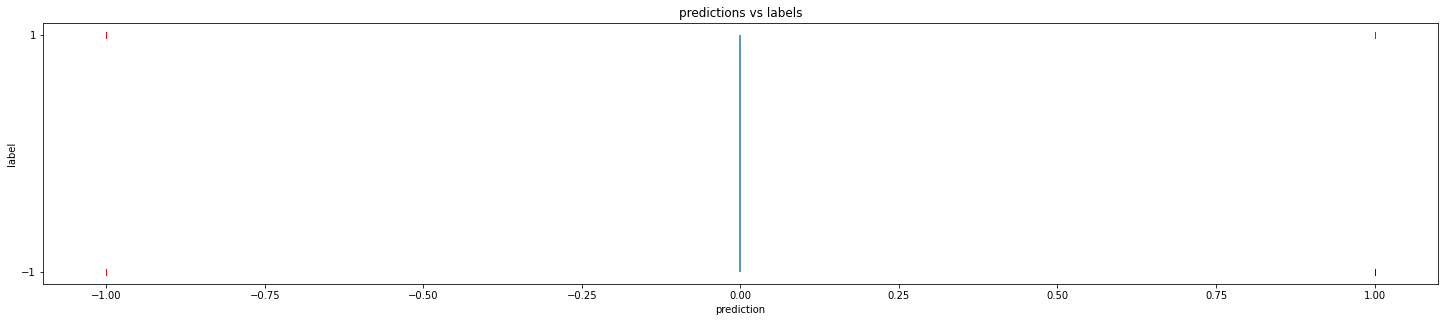

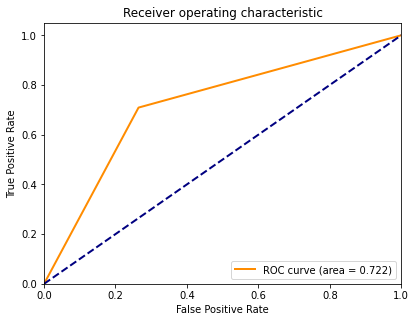

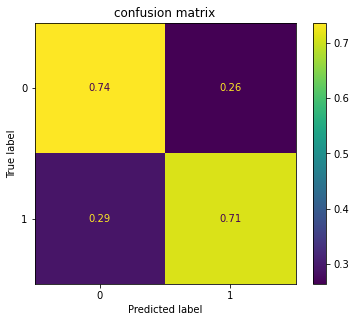

accuracy: 0.721875
f_score_rise: 0.7244582043343654, precision_rise: 0.740506329113924, recall_rise: 0.7090909090909091
f_score_fall: 0.7192429022082019, precision_fall: 0.7037037037037037, recall_fall: 0.7354838709677419


In [10]:
nvae.generate_svm_results()

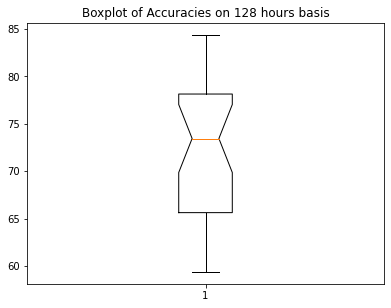

In [11]:
nvae.generate_svm_test_stats()

# BTC_1h

## Conv wide deep net

In [12]:
cwdn = Cwdn('btc_1h_for_target1_1', 'target1', suffix=1, batch_size=127, max_epochs=50)

cuda


In [13]:
cwdn.generate_model(seed=0)

ConvWideDeepLSTMNet(
  (conv_net): ConvNet74(
    (conv1): Conv2d(1, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 0))
    (max1): MaxPool2d(kernel_size=(1, 3), stride=(1, 3), padding=(0, 0), dilation=1, ceil_mode=False)
    (batch1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(48, 64, kernel_size=(3, 5), stride=(1, 1), padding=(1, 0))
    (max2): MaxPool2d(kernel_size=(1, 3), stride=(1, 1), padding=(0, 0), dilation=1, ceil_mode=False)
    (batch2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 64, kernel_size=(3, 7), stride=(1, 1), padding=(1, 0))
    (batch3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv4): Conv3d(1, 1, kernel_size=(64, 1, 1), stride=(1, 1, 1))
    (batch4): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (deep_lstm): DeepLSTMNet(
    (l1): LSTMCell(12, 90)
    (l2): LS

In [14]:
cwdn.train_model(lr=16e-4, weight_decay=5e-4, patience=5, just_load=True)

100%|████████████████████████████████████████████████████████████████████████████| 28468/28468 [05:43<00:00, 82.78it/s]


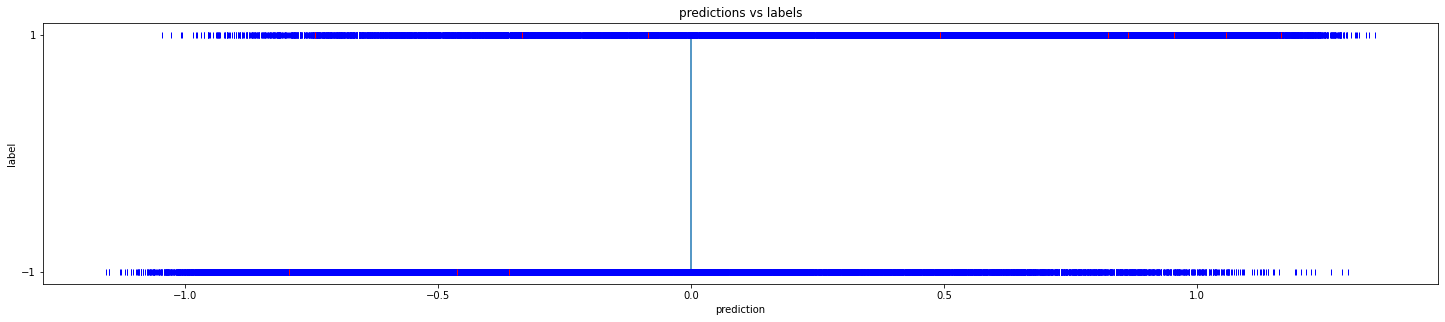

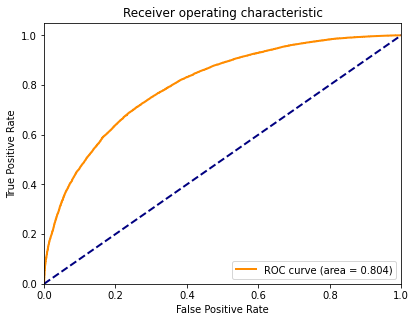

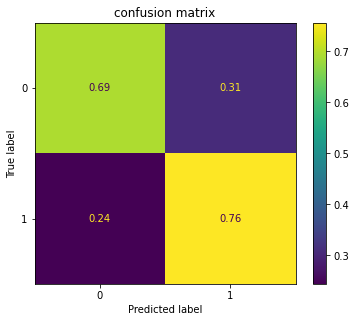

accuracy: 0.7260081495011943
f_score_rise: 0.7418586179507546, precision_rise: 0.7284544391004809, recall_rise: 0.7557653405259609
f_score_fall: 0.7080838323353293, precision_fall: 0.7231310197217551, recall_fall: 0.6936500953218947


100%|██████████████████████████████████████████████████████████████████████████████| 5680/5680 [01:08<00:00, 82.82it/s]


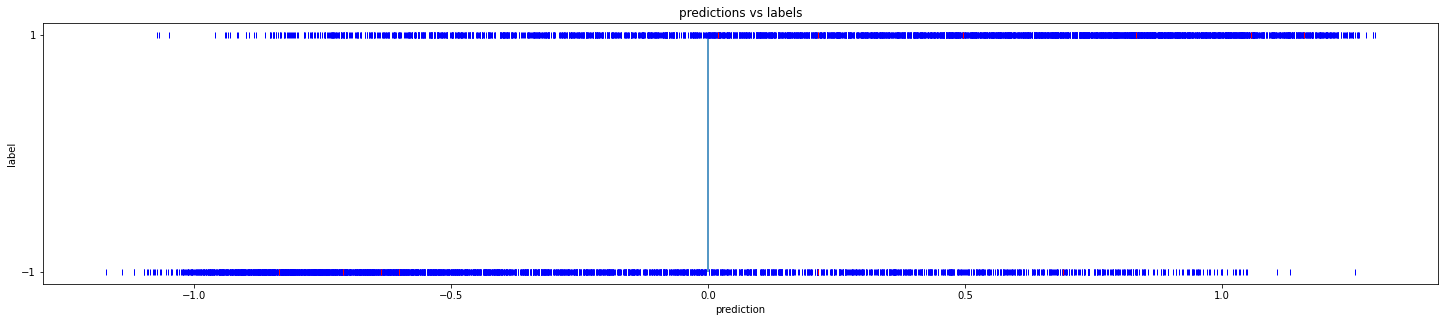

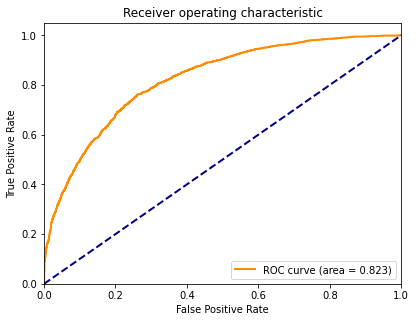

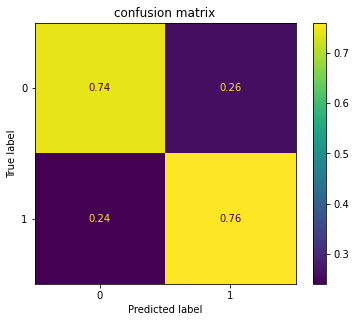

accuracy: 0.75
f_score_rise: 0.7600540723217303, precision_rise: 0.7605681433885695, recall_rise: 0.7595406957109084
f_score_fall: 0.7390665196618891, precision_fall: 0.7385236871098053, recall_fall: 0.7396101507907319


100%|██████████████████████████████████████████████████████████████████████████████| 3838/3838 [00:46<00:00, 82.22it/s]


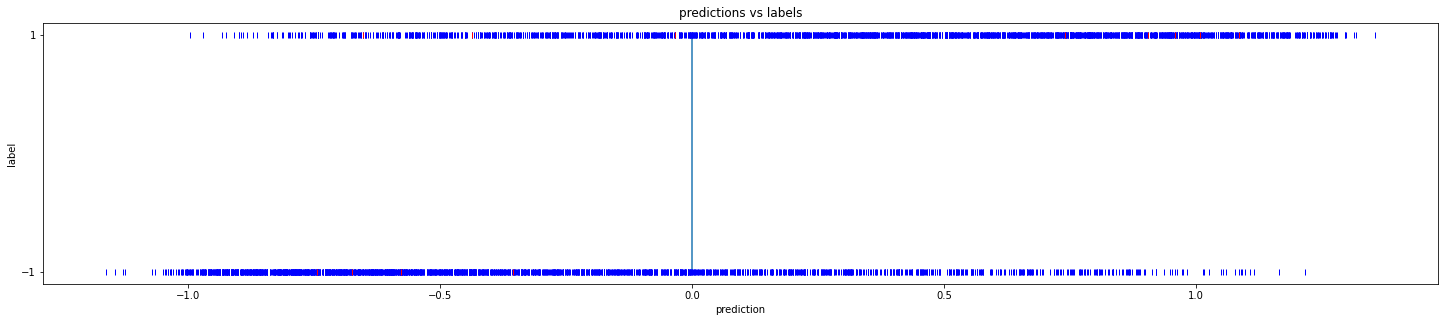

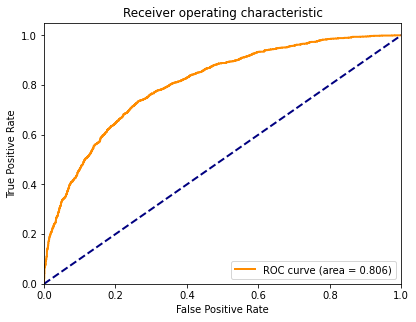

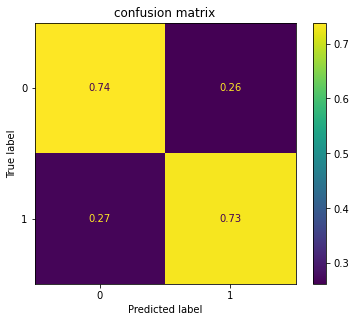

accuracy: 0.7342365815528922
f_score_rise: 0.7369778236204229, precision_rise: 0.7431097243889756, recall_rise: 0.7309462915601023
f_score_fall: 0.7314375987361771, precision_fall: 0.7253263707571802, recall_fall: 0.7376526818906001


In [19]:
cwdn.generate_results()

100%|██████████████████████████████████████████████████████████████████████████████| 3838/3838 [00:47<00:00, 80.00it/s]


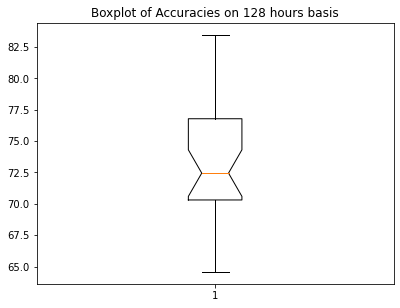

In [15]:
accuracies = cwdn.generate_test_stats()

## NVAE net -> Fully connected

In [2]:
nvae = NVAE('btc_1h_for_target1_1', 'target1', suffix=1, batch_size=127, latent_dim=32, nca_dim=10, onca_c=3, kl_c=0.1, max_epochs=50)

cuda


In [3]:
nvae.generate_autoencoder(seed=1)

conv_net weights frozen
VariationalAutoencoder(
  (encoder): VariationalEncoder(
    (conv_net): ConvNet74(
      (conv1): Conv2d(1, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 0))
      (max1): MaxPool2d(kernel_size=(1, 3), stride=(1, 3), padding=(0, 0), dilation=1, ceil_mode=False)
      (batch1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(48, 64, kernel_size=(3, 5), stride=(1, 1), padding=(1, 0))
      (max2): MaxPool2d(kernel_size=(1, 3), stride=(1, 1), padding=(0, 0), dilation=1, ceil_mode=False)
      (batch2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 64, kernel_size=(3, 7), stride=(1, 1), padding=(1, 0))
      (batch3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv4): Conv3d(1, 1, kernel_size=(64, 1, 1), stride=(1, 1, 1))
      (batch4): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_s

In [4]:
nvae.train_auto_encoder(lr=16e-4, weight_decay=5e-4, patience=1, just_load=True)

100%|██████████████████████████████████████████████████████████████████████████████| 5680/5680 [01:14<00:00, 75.75it/s]


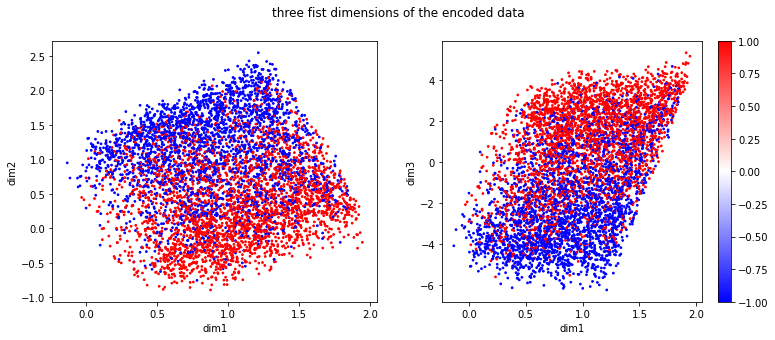

In [5]:
nvae.plot_encoded_space()

In [5]:
nvae.generate_fully_connected_network(seed=0)

In [6]:
nvae.train_fully_connected_net(lr=4e-4, weight_decay=1e-5, w1=0.75, w2=0.25, patience=3, just_load=True)

100%|████████████████████████████████████████████████████████████████████████████| 28468/28468 [06:35<00:00, 71.99it/s]


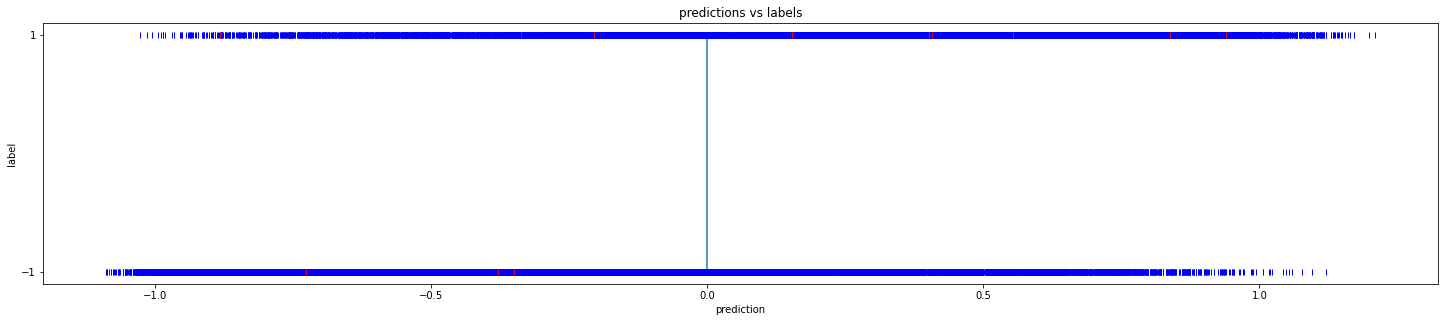

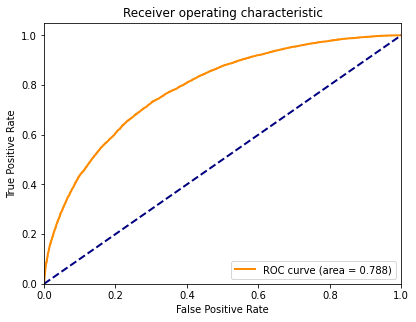

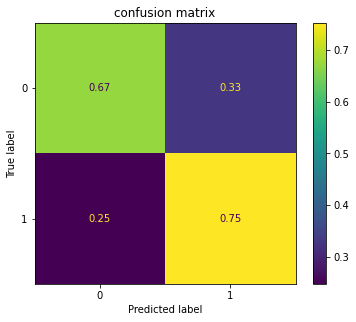

accuracy: 0.7136082619081073
f_score_rise: 0.7323111271628854, precision_rise: 0.713636654508223, recall_rise: 0.7519892110586649
f_score_fall: 0.6920956229464859, precision_fall: 0.7135737092126782, recall_fall: 0.6718727086083003


100%|██████████████████████████████████████████████████████████████████████████████| 5680/5680 [01:16<00:00, 74.44it/s]


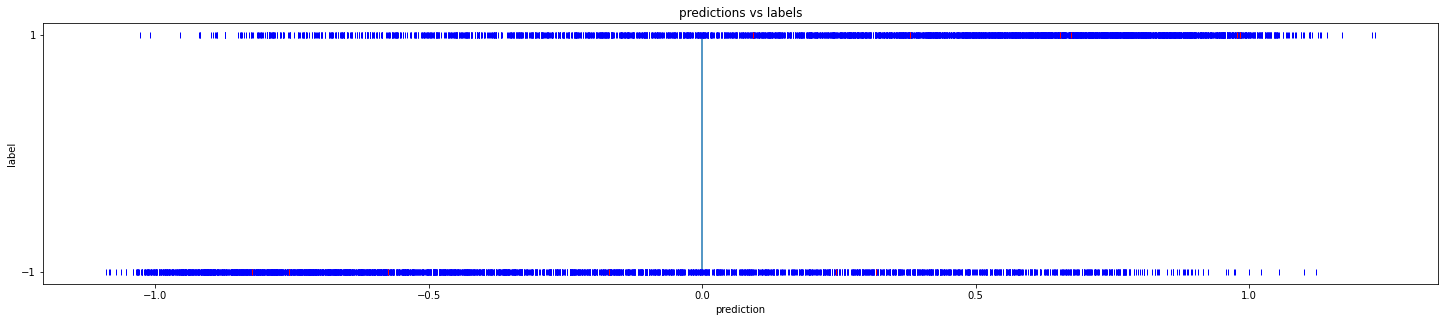

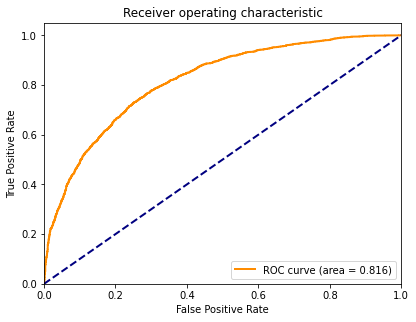

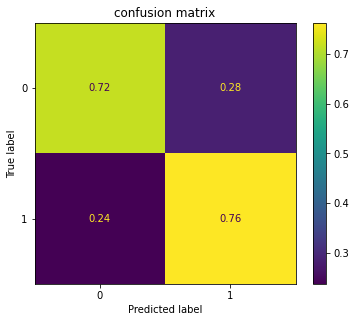

accuracy: 0.7397887323943662
f_score_rise: 0.7532554257095158, precision_rise: 0.7448002641135688, recall_rise: 0.7619047619047619
f_score_fall: 0.7247672253258846, precision_fall: 0.7340626178800452, recall_fall: 0.7157043030525929


100%|██████████████████████████████████████████████████████████████████████████████| 3838/3838 [00:51<00:00, 74.23it/s]


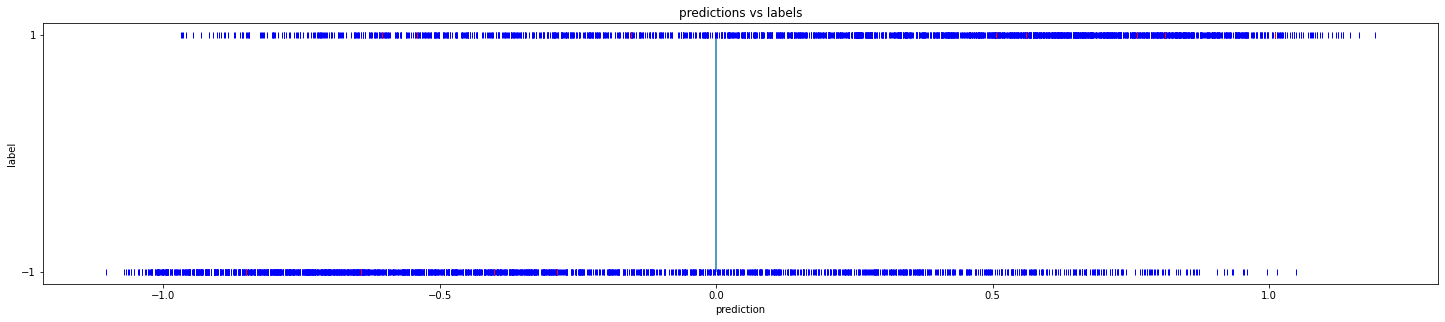

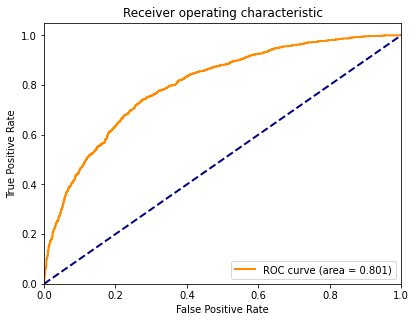

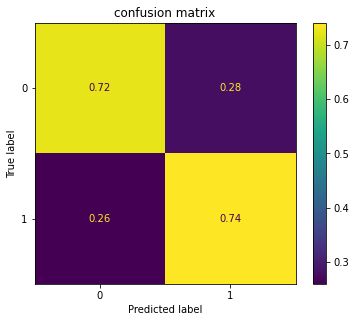

accuracy: 0.7318916102136529
f_score_rise: 0.7378343949044587, precision_rise: 0.7350253807106599, recall_rise: 0.7406649616368286
f_score_fall: 0.7256731538256465, precision_fall: 0.7285867237687366, recall_fall: 0.7227827934147637


In [8]:
nvae.generate_fc_results()

100%|██████████████████████████████████████████████████████████████████████████████| 3838/3838 [00:52<00:00, 72.97it/s]


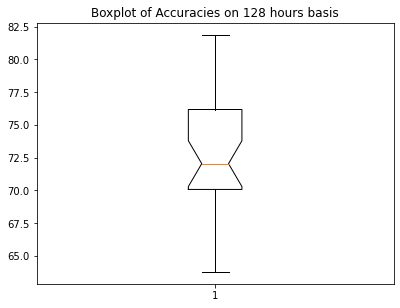

In [7]:
nvae.generate_fc_test_stats()

100%|██████████████████████████████████████████████████████████████████████████████| 3838/3838 [00:51<00:00, 74.40it/s]


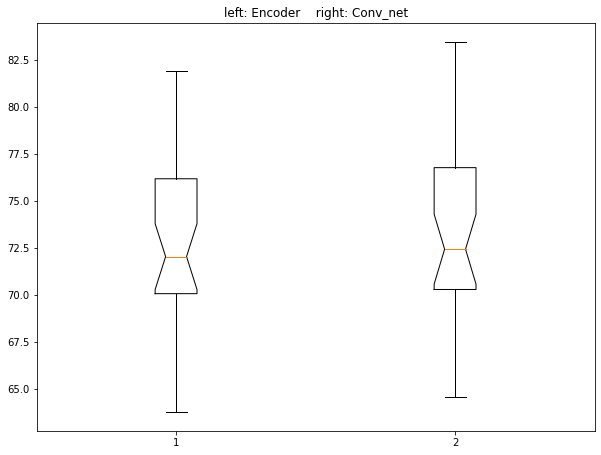

In [21]:
nvae.generate_fc_test_stats(add_plot={'title_1': 'Encoder', 'title_2': 'Conv_net', 'scores': accuracies})

## NVAE net -> SVM

In [9]:
nvae.generate_svm(kernel='rbf', c=1, gamma='scale')

In [10]:
nvae.train_svm()

100%|████████████████████████████████████████████████████████████████████████████| 28468/28468 [06:18<00:00, 75.20it/s]


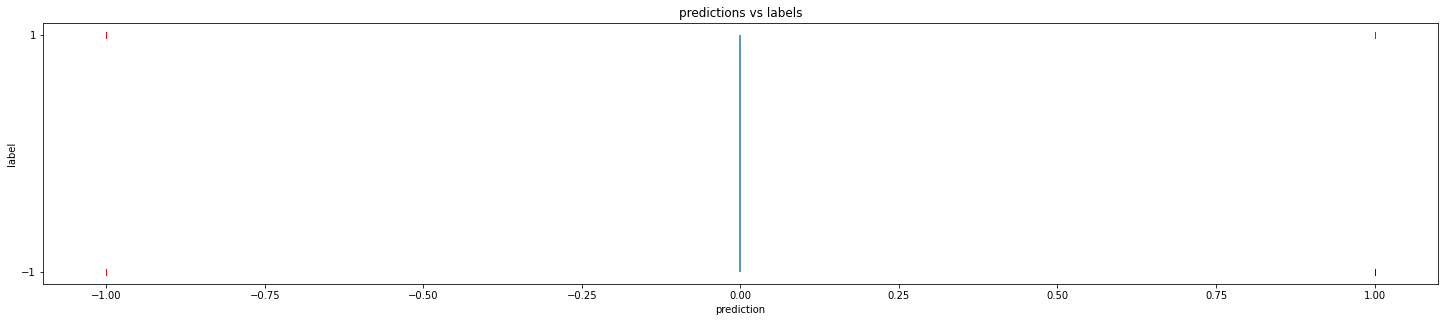

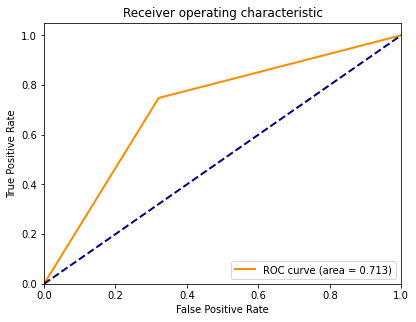

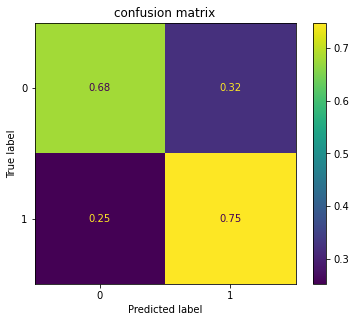

accuracy: 0.7148728396796403
f_score_rise: 0.7320503086521638, precision_rise: 0.7170665459483929, recall_rise: 0.7476736345246122
f_score_fall: 0.6953421161280636, precision_fall: 0.7122645136485967, recall_fall: 0.679205162047221


100%|██████████████████████████████████████████████████████████████████████████████| 5680/5680 [01:12<00:00, 78.43it/s]


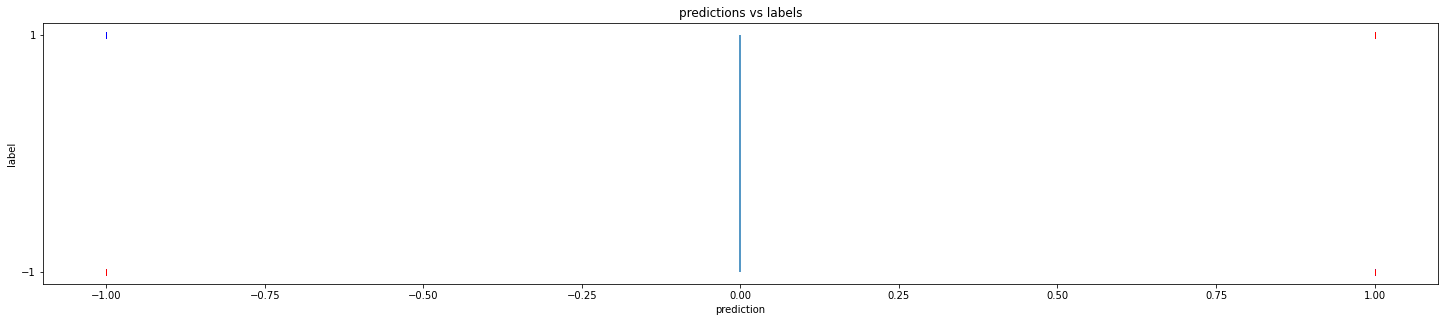

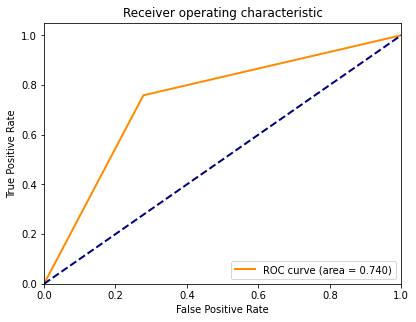

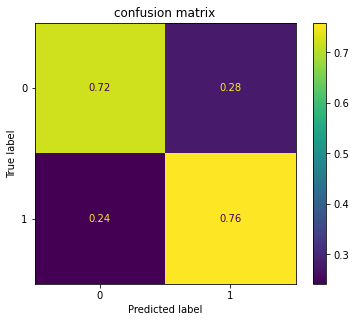

accuracy: 0.7410211267605634
f_score_rise: 0.753312091229247, precision_rise: 0.7481678880746169, recall_rise: 0.7585275244849713
f_score_fall: 0.7274411710209375, precision_fall: 0.7330097087378641, recall_fall: 0.7219566016917984


100%|██████████████████████████████████████████████████████████████████████████████| 3838/3838 [00:48<00:00, 79.60it/s]


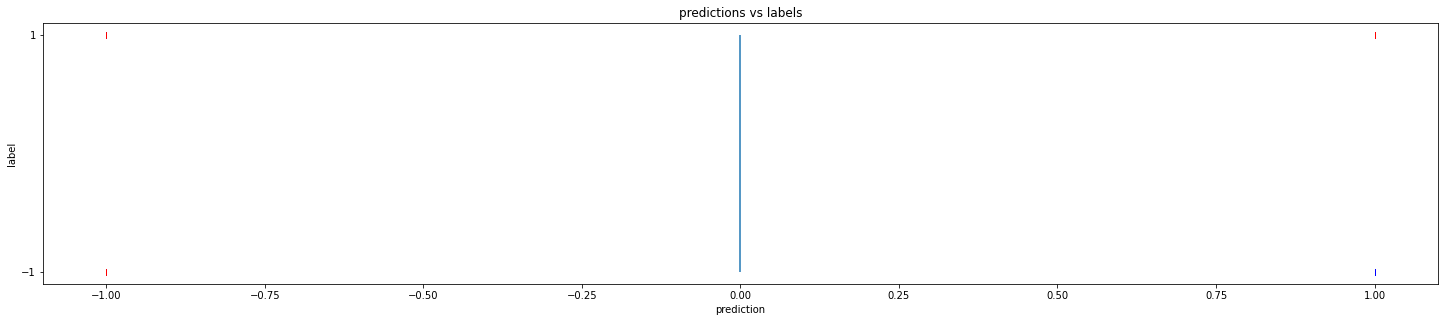

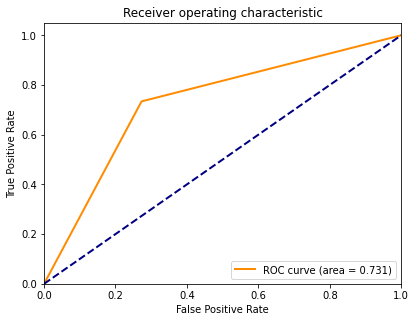

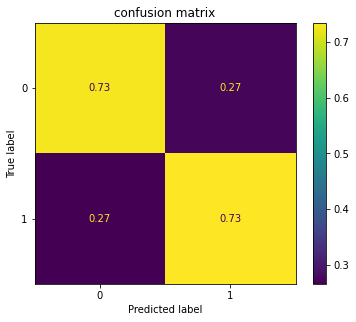

accuracy: 0.7305888483585201
f_score_rise: 0.7351434426229507, precision_rise: 0.7362750128270908, recall_rise: 0.7340153452685422
f_score_fall: 0.7258748674443266, precision_fall: 0.7247220751720487, recall_fall: 0.7270313329792883


In [11]:
nvae.generate_svm_results()

# BTC_15m

## Conv wide deep net

In [22]:
cwdn = Cwdn('btc_15m_for_target1_1', 'target1', suffix=1, batch_size=127, max_epochs=50)

cuda


In [23]:
cwdn.generate_model(seed=0)

ConvWideDeepLSTMNet(
  (conv_net): ConvNet74(
    (conv1): Conv2d(1, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 0))
    (max1): MaxPool2d(kernel_size=(1, 3), stride=(1, 3), padding=(0, 0), dilation=1, ceil_mode=False)
    (batch1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(48, 64, kernel_size=(3, 5), stride=(1, 1), padding=(1, 0))
    (max2): MaxPool2d(kernel_size=(1, 3), stride=(1, 1), padding=(0, 0), dilation=1, ceil_mode=False)
    (batch2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 64, kernel_size=(3, 7), stride=(1, 1), padding=(1, 0))
    (batch3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv4): Conv3d(1, 1, kernel_size=(64, 1, 1), stride=(1, 1, 1))
    (batch4): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (deep_lstm): DeepLSTMNet(
    (l1): LSTMCell(12, 90)
    (l2): LS

In [24]:
cwdn.train_model(lr=16e-4, weight_decay=5e-4, patience=5, just_load=True)

100%|██████████████████████████████████████████████████████████████████████████| 113872/113872 [22:50<00:00, 83.11it/s]


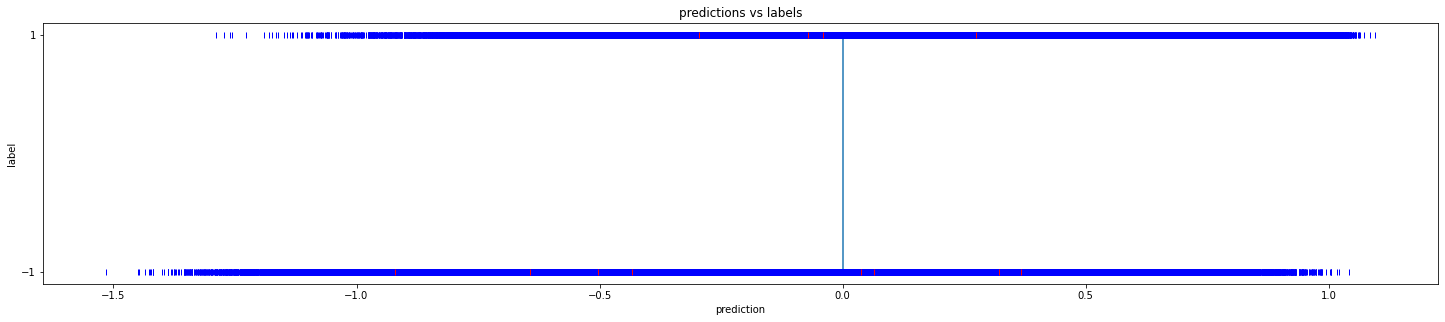

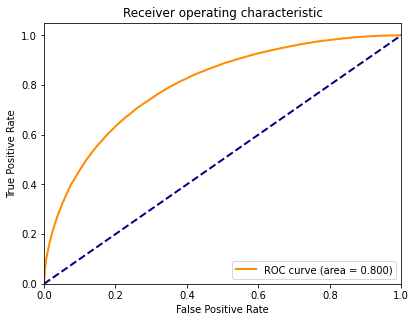

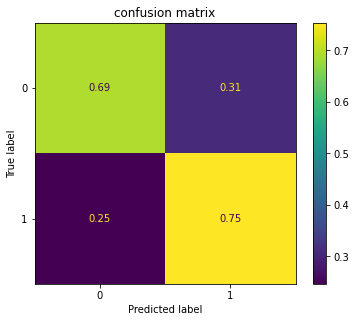

accuracy: 0.723443866797808
f_score_rise: 0.736393618267959, precision_rise: 0.7202246455120018, recall_rise: 0.7533052472941499
f_score_fall: 0.709156061249746, precision_fall: 0.727167695746051, recall_fall: 0.6920151405912041


100%|████████████████████████████████████████████████████████████████████████████| 22720/22720 [04:30<00:00, 83.91it/s]


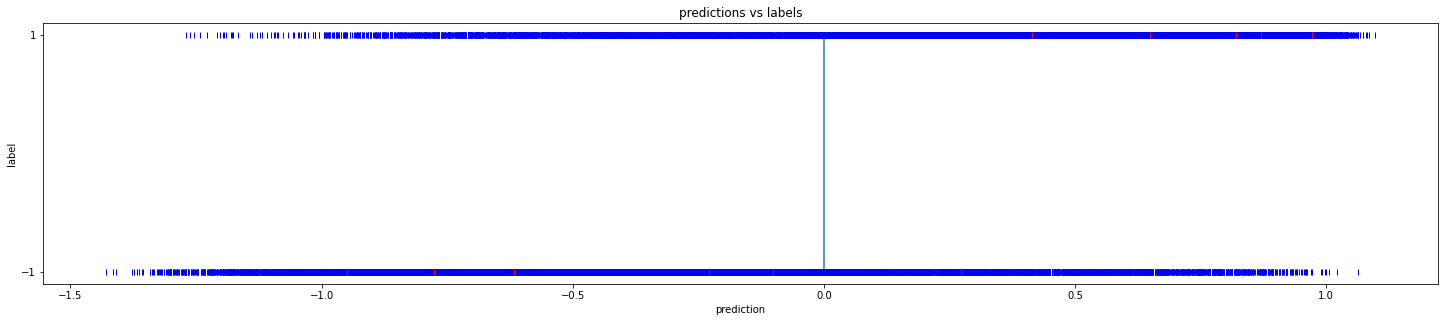

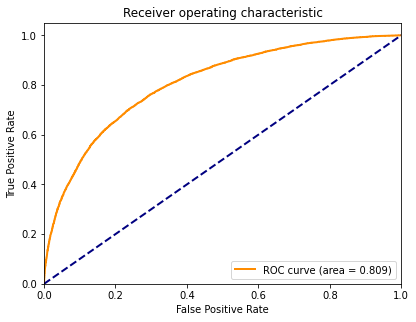

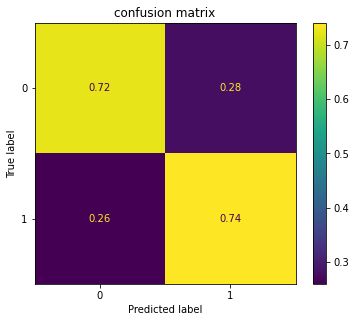

accuracy: 0.7314700704225352
f_score_rise: 0.7392177815772601, precision_rise: 0.7382395628788525, recall_rise: 0.7401985961307995
f_score_fall: 0.7232479020185983, precision_fall: 0.724266375942582, recall_fall: 0.722232288458054


100%|████████████████████████████████████████████████████████████████████████████| 15346/15346 [03:04<00:00, 82.99it/s]


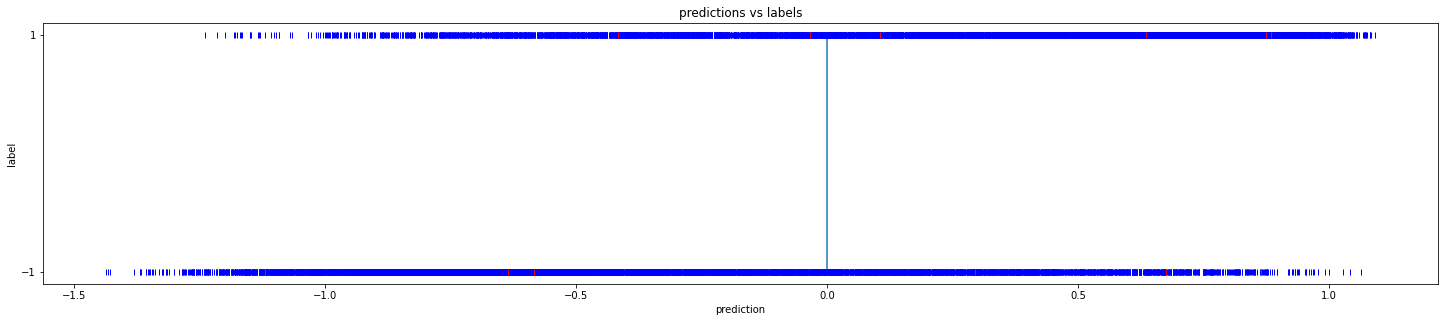

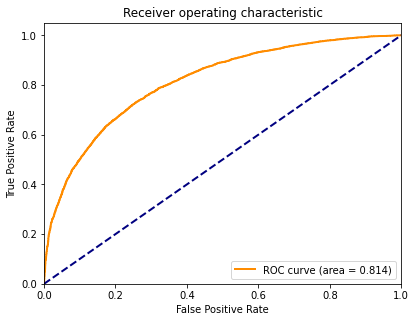

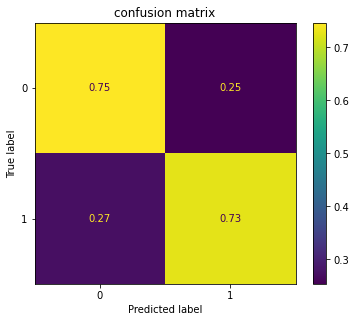

accuracy: 0.7360224162648247
f_score_rise: 0.7337495892211633, precision_rise: 0.7416954557533882, recall_rise: 0.7259721680322538
f_score_fall: 0.7382567681075144, precision_fall: 0.7305626598465473, recall_fall: 0.7461146663184015


In [6]:
cwdn.generate_results()

100%|████████████████████████████████████████████████████████████████████████████| 15346/15346 [03:10<00:00, 80.36it/s]


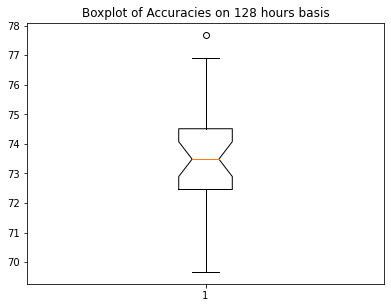

In [25]:
accuracies = cwdn.generate_test_stats()

## NVAE net -> Fully connected

In [2]:
nvae = NVAE('btc_15m_for_target1_1', 'target1', suffix=1, batch_size=127, latent_dim=32, nca_dim=10, onca_c=3, kl_c=0.1, max_epochs=50)

cuda


In [3]:
nvae.generate_autoencoder(seed=0)

conv_net weights frozen
VariationalAutoencoder(
  (encoder): VariationalEncoder(
    (conv_net): ConvNet74(
      (conv1): Conv2d(1, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 0))
      (max1): MaxPool2d(kernel_size=(1, 3), stride=(1, 3), padding=(0, 0), dilation=1, ceil_mode=False)
      (batch1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(48, 64, kernel_size=(3, 5), stride=(1, 1), padding=(1, 0))
      (max2): MaxPool2d(kernel_size=(1, 3), stride=(1, 1), padding=(0, 0), dilation=1, ceil_mode=False)
      (batch2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 64, kernel_size=(3, 7), stride=(1, 1), padding=(1, 0))
      (batch3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv4): Conv3d(1, 1, kernel_size=(64, 1, 1), stride=(1, 1, 1))
      (batch4): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_s

In [4]:
nvae.train_auto_encoder(lr=16e-4, weight_decay=5e-4, patience=1, just_load=True)

100%|████████████████████████████████████████████████████████████████████████████| 22720/22720 [04:52<00:00, 77.70it/s]


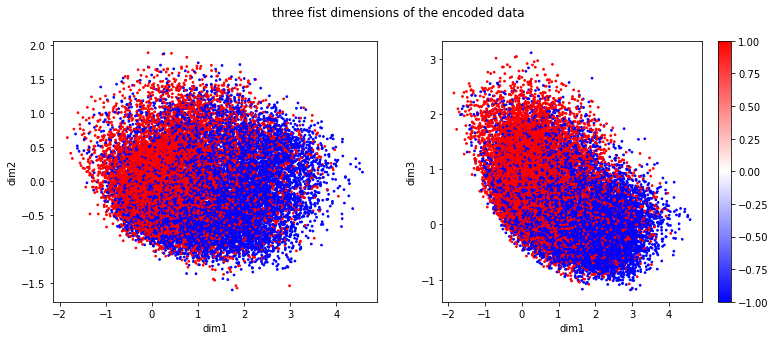

In [5]:
nvae.plot_encoded_space()

In [5]:
nvae.generate_fully_connected_network(seed=0)

In [6]:
nvae.train_fully_connected_net(lr=4e-4, weight_decay=1e-5, w1=0.75, w2=0.25, patience=3, just_load=True)

100%|██████████████████████████████████████████████████████████████████████████| 113872/113872 [24:45<00:00, 76.64it/s]


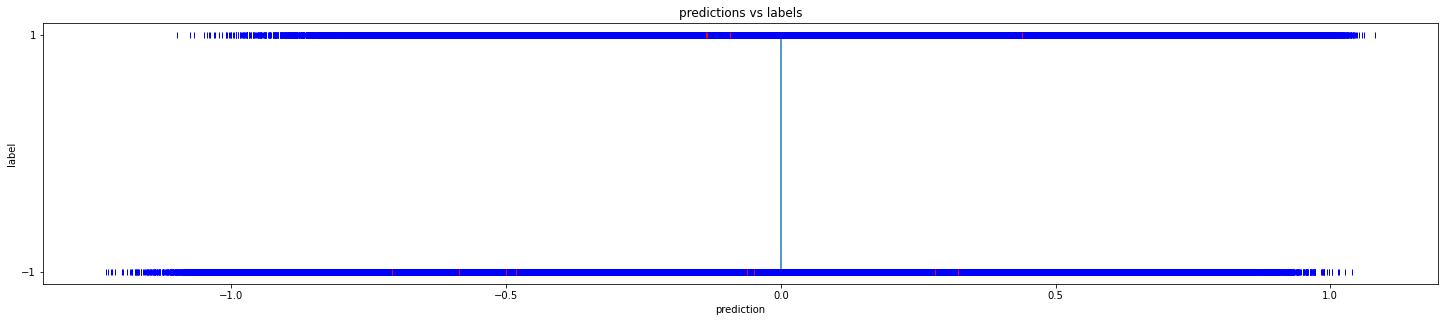

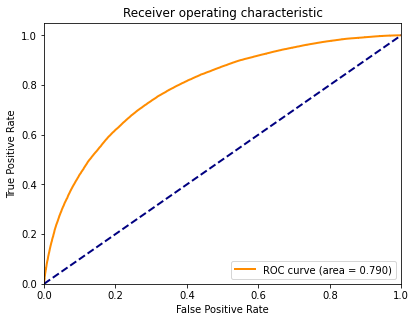

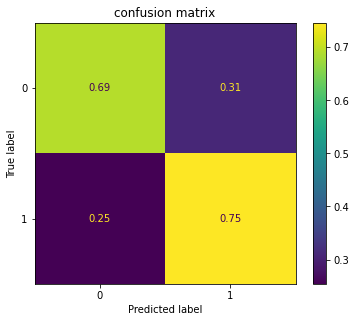

accuracy: 0.7184733736124772
f_score_rise: 0.7308899820358276, precision_rise: 0.7167978397602661, recall_rise: 0.7455473352514043
f_score_fall: 0.7048555488040656, precision_fall: 0.7203884225977644, recall_fall: 0.6899783705839942


100%|████████████████████████████████████████████████████████████████████████████| 22720/22720 [04:57<00:00, 76.27it/s]


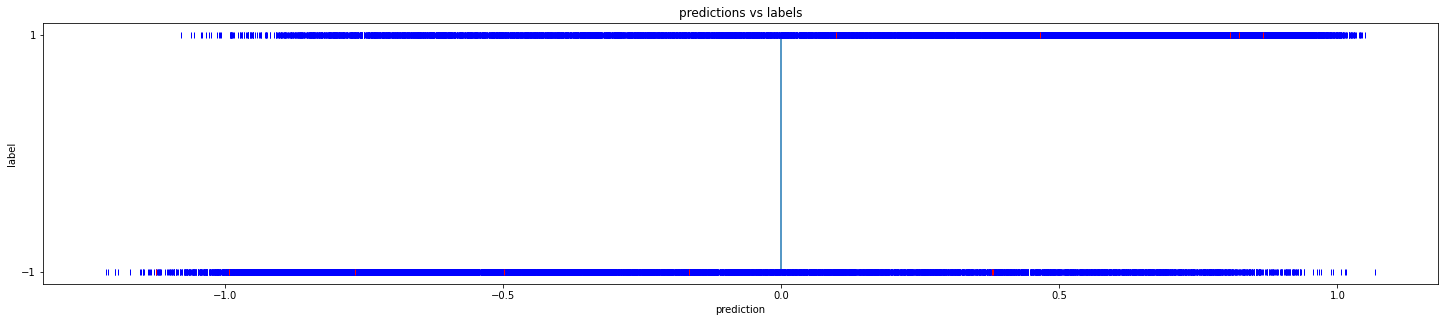

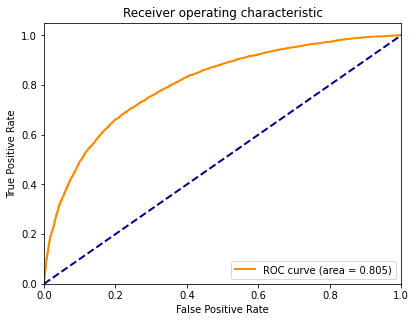

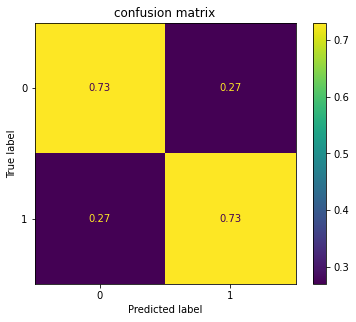

accuracy: 0.730193661971831
f_score_rise: 0.73561632019322, precision_rise: 0.741307371349096, recall_rise: 0.7300119842492724
f_score_fall: 0.7245439022198257, precision_fall: 0.7187945791726106, recall_fall: 0.7303859394817902


100%|████████████████████████████████████████████████████████████████████████████| 15346/15346 [03:22<00:00, 75.95it/s]


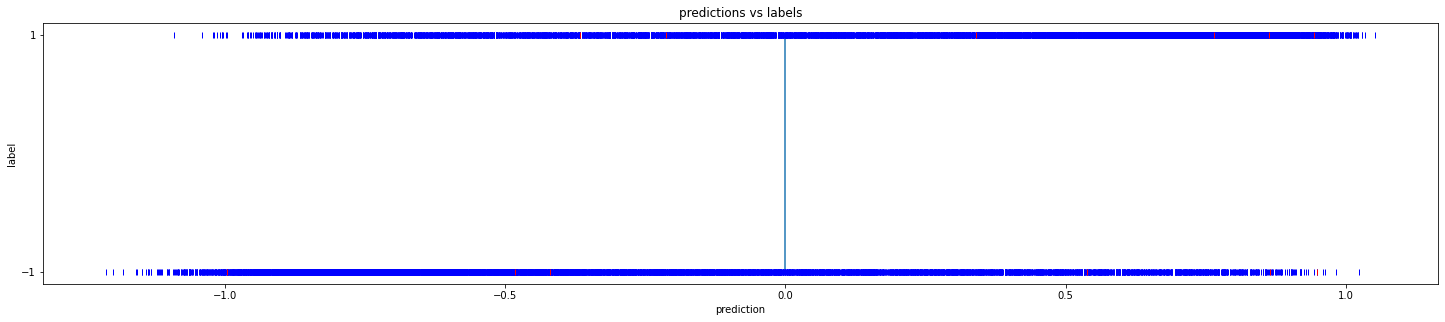

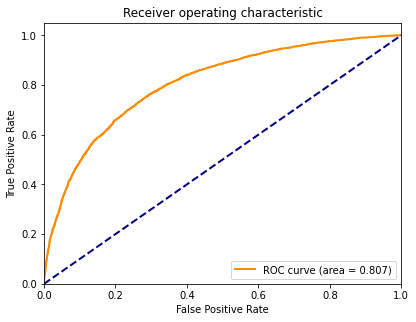

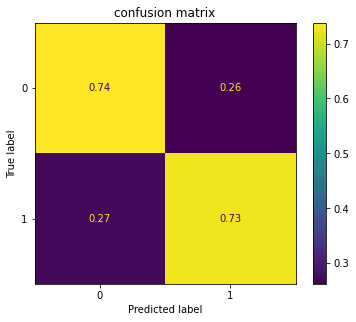

accuracy: 0.733090056040662
f_score_rise: 0.7322525820368675, precision_rise: 0.7361019844920489, recall_rise: 0.7284432305891534
f_score_fall: 0.7339223073924905, precision_fall: 0.7301279565723149, recall_fall: 0.737756301423534


In [8]:
nvae.generate_fc_results()

100%|████████████████████████████████████████████████████████████████████████████| 15346/15346 [03:26<00:00, 74.23it/s]


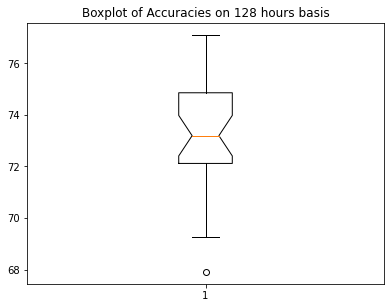

In [7]:
nvae.generate_fc_test_stats()

100%|████████████████████████████████████████████████████████████████████████████| 15346/15346 [03:28<00:00, 73.53it/s]


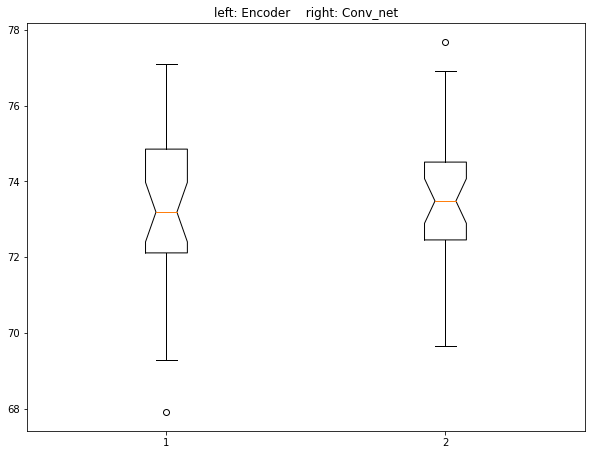

In [31]:
nvae.generate_fc_test_stats(add_plot={'title_1': 'Encoder', 'title_2': 'Conv_net', 'scores': accuracies})

## NVAE net -> SVM

In [9]:
nvae.generate_svm(kernel='rbf', c=1, gamma='scale')

In [10]:
nvae.train_svm()

100%|██████████████████████████████████████████████████████████████████████████| 113872/113872 [24:03<00:00, 78.86it/s]


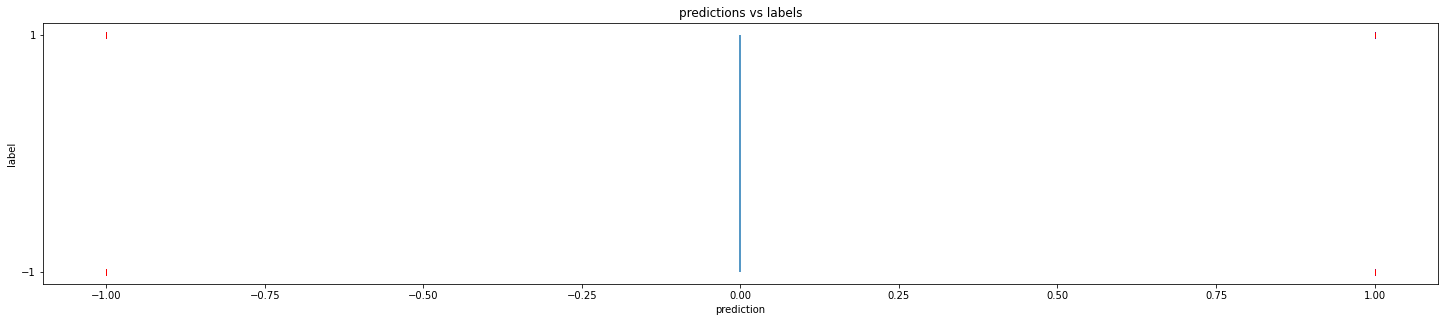

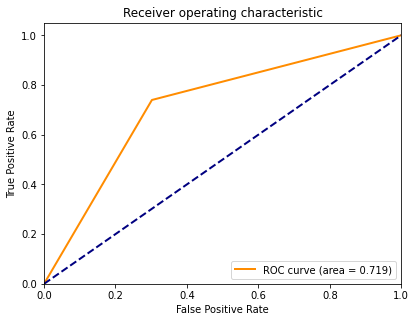

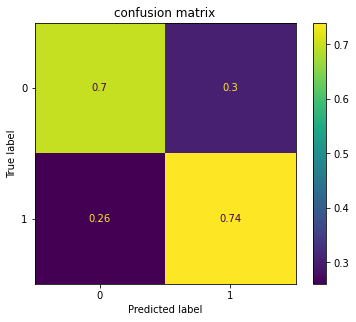

accuracy: 0.7194042433609666
f_score_rise: 0.7299983099543688, precision_rise: 0.720524454527257, recall_rise: 0.739724619810933
f_score_fall: 0.7079448649043911, precision_fall: 0.7181588902900379, recall_fall: 0.6980173035328047


100%|████████████████████████████████████████████████████████████████████████████| 22720/22720 [04:46<00:00, 79.17it/s]


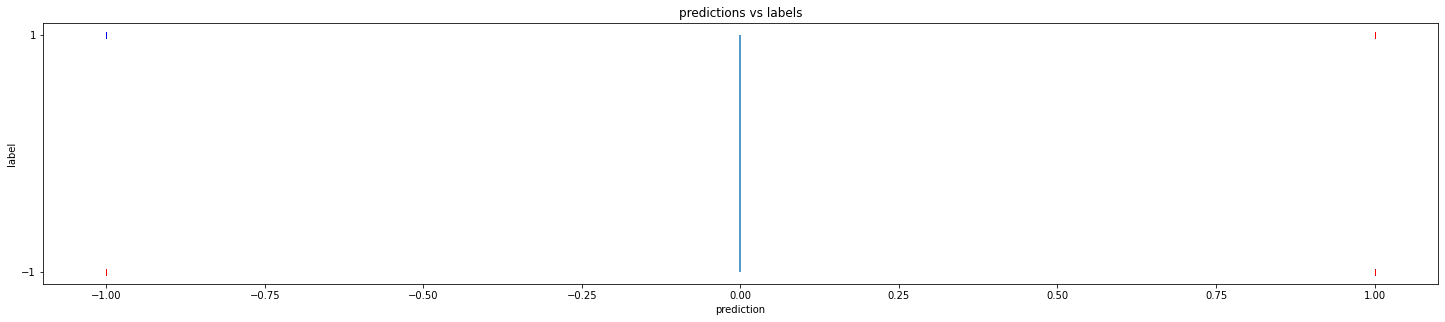

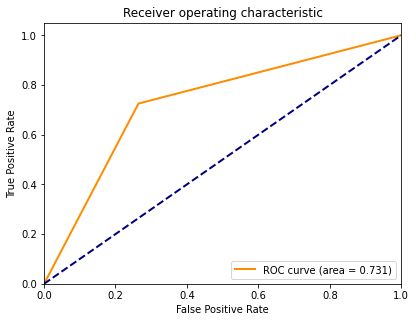

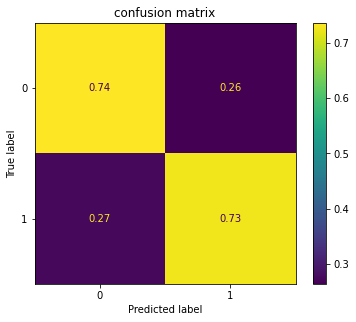

accuracy: 0.7303697183098592
f_score_rise: 0.7344833564493758, precision_rise: 0.7438981562774364, recall_rise: 0.7253038863208354
f_score_fall: 0.7261266094420601, precision_fall: 0.7167696381288614, recall_fall: 0.7357311107084616


100%|████████████████████████████████████████████████████████████████████████████| 15346/15346 [03:14<00:00, 78.88it/s]


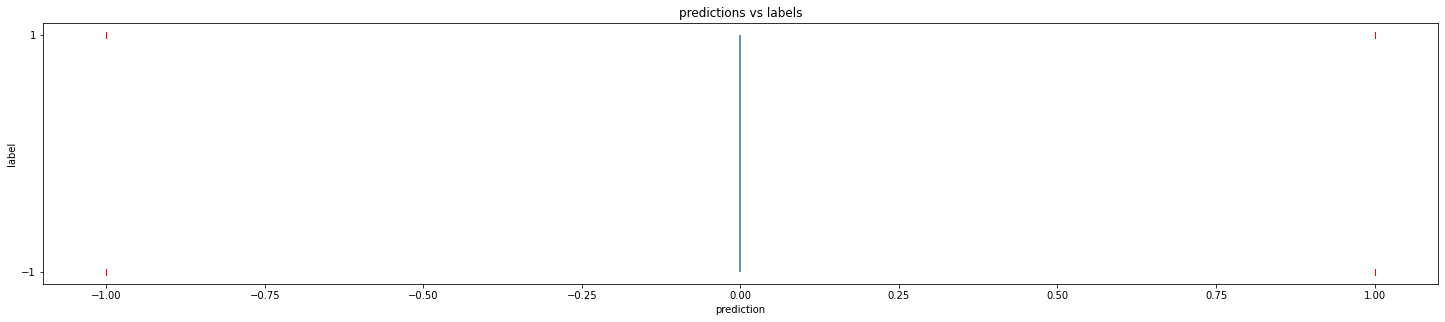

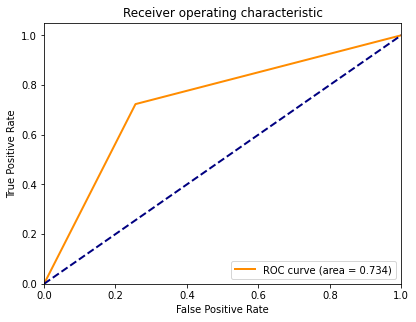

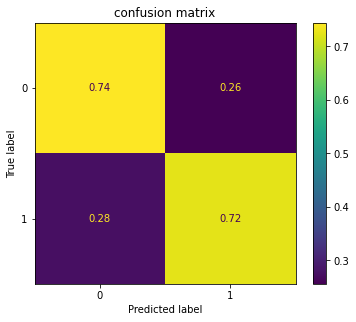

accuracy: 0.7335462009644207
f_score_rise: 0.7311460319547637, precision_rise: 0.7393617021276596, recall_rise: 0.7231109377032123
f_score_fall: 0.735903894594071, precision_fall: 0.7279580884232048, recall_fall: 0.7440250750946846


In [11]:
nvae.generate_svm_results()